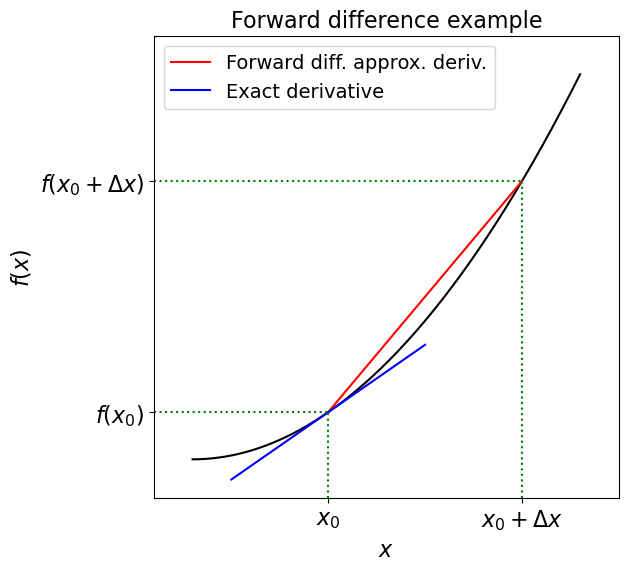

In [2]:
""" 
- Learn about finite difference approximations to derivatives
    - Forward difference and Taylor series
- Be able to implement forward and central difference methods
- Calculate higher-order derivatives
- Solve simple ODEs using the finite difference method

"""
#%%
### Finite difference (single spatial dimension)
# estimates derivative of functions

# forward difference (forward = delta x > 0)
import numpy as np
import matplotlib.pyplot as plt
from sympy import Derivative

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
ax1.set_title('Forward difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the 'exact' solution
ax1.plot(x, f(x), 'k')

# choose and plot two x locations to take the difference between
x0 = 0.35
dx = 0.5
x1 = x0 + dx
# plot a line representing the discrete derivative
ax1.plot([x0, x1], [f(x0), f(x1)], 'r', label = 'Forward diff. approx. deriv.')
"[x0, x1] are start and end point x values"
"[f(x0), f(x1)] are tart and end point y values"

# plot a line representing the exact derivative (given by function f(.)) at x=x0
h = dx/2
"length of blue line = dx; h * df(x0) = change in y due to h"
ax1.plot([x0 - h, x0 + h], [f(x0) - (h * df(x0)), f(x0) + (h * df(x0))], 'b', label = 'Exact derivative')

# add some axes labels and lines etc
ax1.set_xticks((x0, x1)) 
"x1 = x0 + dx"
# 'g:' lines are for green dotted lines
ax1.set_xticklabels(('$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([x0, x0], [-0.1, f(x0)], 'g:')
ax1.plot([x1, x1], [-0.1, f(x1)], 'g:')
ax1.set_yticks((f(x0), f(x1)))
ax1.set_yticklabels(('$f(x_0)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, x0], [f(x0), f(x0)], 'g:')
ax1.plot([-0.1, x1], [f(x1), f(x1)], 'g:')

ax1.legend(loc='best', fontsize=14)

In [ ]:

# %%
### Taylor series 
# f (x0 + h) = f(x0) + hf'(x0) + ...
# about point x0 (function on RHS are evaluated at this point)
# more terms = better approximation valid a larger distance from x0

## Ex 2.1 forward difference to compute an appriximation to f'(2.36)
# f(2.36)=0.85866
# f(2.37)=0.86289
# You should get an answer of 0.423.

dx = 0.01
# f'(2.36) = (f(2.36 + 0.01) - f(2.36)) / 0.01
df = (0.86289 - 0.85866) / dx
print(df)

# %%
### Central difference 
# estimates derivative of functions but is second-order accurate
# takes 2 f(x) points and estimates in between
    # requires f (x + dx), f (x - dx) and dx
# halve h --> error drop by a factor of 4 instead of 2 (first-order forward/ backword differencing)

# 2 Taylor series from opposite directions (positive and negative x from x0)
# subtract second equation from first and rearrange for f'(x0)
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)

# ax.grid(True)
ax1.set_title('Central difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the exact solution
ax1.plot(x, f(x), 'k')
# choose and plot two x locations to take the difference between
dx = 0.4
x0 = 0.5
xl = x0 - dx
xr = x0 + dx
# plot a line representing the discrete derivative
ax1.plot([xl, xr], [f(xl), f(xr)], 'r', label = 'Central diff. approx. deriv.')
# plot a line representing the exact derivative at x=x0
h = dx / 2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')
# add some axes labels and lines etc
ax1.set_xticks((xl, x0, xr))
ax1.set_xticklabels(('$x_0-\Delta x$', '$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([xl, xl], [-0.1, f(xl)], 'k:')
ax1.plot([xr, xr], [-0.1, f(xr)], 'k:')
ax1.plot([x0, x0], [-0.1, f(x0)], 'k:')
ax1.set_yticks((f(xl), f(xr)))
ax1.set_yticklabels(('$f(x_0-\Delta x)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, xl], [f(xl), f(xl)], 'k:')
ax1.plot([-0.1, xr], [f(xr), f(xr)], 'k:')
ax1.legend(loc='best', fontsize=14)

# %%
## Ex 2.2 central differencing

dx = 0.1
# central differencin about 0.2 with f(0.1) and f(0.3)
# df = [f(0.3) - f(0.1)] / 2 * dx
df = (0.192916 - 0.078348) / 2 * dx

print(df)

# %%
## Function to perform numerical differentiation
# returns the approximation of the derivative of Python f(x)

# apply to differentiate f(x) = e ** x at x = 0; f(x) = e ** (-2 * x) at x = 0;
# f (x) = cos(x) at x = 2pi; f(x) = ln(x) at x = 1

import numpy as np

dx = 0.01

def diff(f , x, dx = 1.0e-6):
    numerator = f(x + dx) - f(x - dx)
    derivative = numerator / (2.0 * dx)

    return derivative

# Differntiate f(x) = e ** x at x = 0
# estimating derivative of f(x) with f (x + dx) and f (x - dx)
x = 0
f = np.exp
derivative = diff(f , x, dx)
print("The approximate derivative of exp(x) at x = 0 is: %f. The error is %f."
      % (derivative, abs(derivative - 1)))

# Differentiate f(x) = e ** (-2 * x) at x = 0
x = 0
def g(x):
    return np.exp (-2 * x)

derivative = diff(g, x, dx)
print('The approximate derivative of exp(-2*x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - (-2.0))))

# Differentiate f (x) = cos(x) at x = 2pi
x = 2 * np.pi
f = np.cos

derivative = diff(f, x, dx)

print('The approximate derivative of cos(x) at x = 2*pi is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 0)))

# Differentiate f(x) = ln(x) at x = 1
x = 1
f = np.log

derivative = diff(f, x, dx)

print('The approximate derivative of ln(x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 1)))

# %%
## Ex 2.3 compute the derivative of sin(x) 
# using a) forward differencing and b) central differencing
# decreasing values of h (h = 1 start) dx = 0.01

import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(1e-3, 1)
ax1.set_ylim(1e-7, 1)
ax1.set_title('Derivative of sin(x)')
ax1.set_xlabel('Error', fontsize=16)
ax1.set_ylabel('h', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

h = 1
dx = 0.01

def forward(x0, h, )
# forward
ax1.plot([x0, x1], [f(x0), f(x1)], 'r', label = 'Forward diff. approx. deriv.')
